In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
N_GRAPH = 1000

In [107]:
def get_xs(xl, xr, n):
    if n == 1:
        return np.array([xl])
    s = (xr - xl) / (n - 1)
    return np.arange(xl, xr + 10 ** -9, s)

In [108]:
def get_diff(xs, f1, f2):
    return list(map(lambda x: abs(f1(x) - f2(x)), xs))

In [109]:
def draw(xs, ys, names=None):
    if type(xs) is not list:
        xs = [xs]
        ys = [ys]
        if names is not None:
            names = [names]
            
    n = len(xs)
    for i in range(n):
        plt.plot(xs[i], ys[i])
        
    if names is not None:
        plt.legend(names)
    plt.show()

In [110]:
T = [10]
a = [1, np.sqrt(20)]
N = [10, 50, 100]

def get_f0(a):
    def f0(x, y0, y1):
        return y1
    return f0

def get_f1(a):
    def f1(x, y0, y1):
        return a ** 2 * y0
    return f1

def get_y0(a):
    return 1

def get_y1(a):
    return -a

def get_y(a):
    def y(x):
        return np.e ** (-a * x)
    return y

In [111]:
def euler(f0, f1, y0, y1, N, T):
    ys0 = [y0]
    h = T / N
    x = 0
    for i in range(N):
        y0, y1 = y0 + h * f0(x, y0, y1), y1 + h * f1(x, y0, y1)
        ys0.append(y0)
        x += h
    return ys0

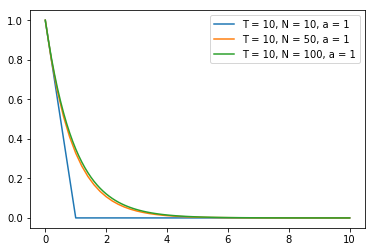

In [112]:
ai = a[0]

xs, ys, names = [], [], []

for Ti in T:
    for Ni in N:
        xsi = get_xs(0, Ti, Ni + 1)
        ysi = euler(get_f0(ai), get_f1(ai), 
                   get_y0(ai), get_y1(ai), 
                   Ni, Ti)
        xs.append(xsi)
        ys.append(ysi)
        names.append("T = " + str(Ti) + ", N = " + str(Ni) + ", a = " + str(ai))
        
draw(xs, ys, names)

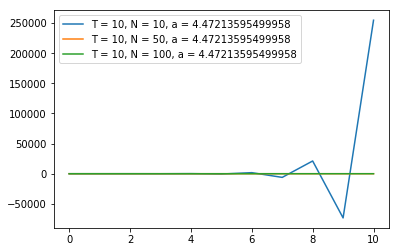

In [113]:
ai = a[1]

xs, ys, names = [], [], []

for Ti in T:
    for Ni in N:
        xsi = get_xs(0, Ti, Ni + 1)
        ysi = euler(get_f0(ai), get_f1(ai), 
                   get_y0(ai), get_y1(ai), 
                   Ni, Ti)
        xs.append(xsi)
        ys.append(ysi)
        names.append("T = " + str(Ti) + ", N = " + str(Ni) + ", a = " + str(ai))
        
draw(xs, ys, names)

In [114]:
def get_max_error(Ti, Ni, ai):
    xsi = get_xs(0, Ti, Ni + 1)
    ysi = euler(get_f0(ai), get_f1(ai), 
               get_y0(ai), get_y1(ai), 
               Ni, Ti)
    ysr = list(map(get_y(ai), xsi))
    return max(get_diff(list(range(len(xsi))),
                        lambda j: ysi[j],
                         lambda j: ysr[j]))

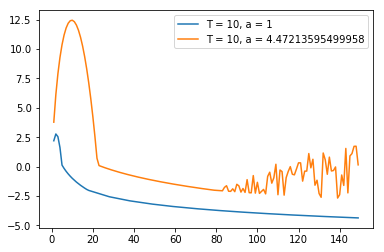

In [115]:
ns = list(range(1, 150))
Ns, ys, names = [], [], []
for Ti in T:
    for ai in a:
        nsi = ns
        ysi = list(map(lambda n: get_max_error(Ti, n, ai), nsi))
        Ns.append(nsi)
        ys.append(ysi)
        names.append("T = " + str(Ti) + ", a = " + str(ai))
        
ys = np.array(ys)
ys = np.log(ys)

draw(Ns, ys, names)